# 线性回归
1. 描述
对一组数据$x={x_1,x_2,...,x_n}, y={y_1,y_2,...,y_n}$,通过学习得到一个线性组合来进行预测；
2. 函数形式
<center>$f(x)=w_1x_1+w_2x_2+...+w_tx_t+b$</center>
3.向量形式
<center>$f(x)=W^Tx+b$</center>
4. 目标函数
通过最小化均方误差，来得到最优的$w,b$
<center>$L(w,b)=arg min\sum(f(x_i)-y_i)^2=arg min\sum(wx_i+b-y_i)^2$</center>
5. 求解最优的$w,b$
<center>$$\frac{\partial L(w,b)}{\partial w}=\sum2(wx_i+b-y_i)*x_i
=2(w \sum x_i^2+ \sum(b-y_i)x_i)$$</center>
<center>$$\frac{\partial L(w,b)}{\partial b}=\sum2(wx_i+b-y_i)
=2(\sum (wx_i - y_i)+\sum b)$$</center>
令偏导为0，得到最优的$w,b$
<center>$$w=\frac{\sum y_i(x_i - \bar x)}{\sum x_i^2 - \frac{1}{m}(\sum x_i)^2}$$</center>
<center>$$b=\frac{1}{m}\sum (y_i - wx_i)$$</center>
6. 矩阵形式
<center>$X \cdot w^T = y$</center>

In [52]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(100, 1)


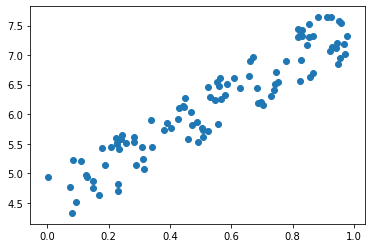

In [53]:
X = np.random.rand(100,1)
print(X.shape)
y = 3 * X + 4 + np.random.rand(100,1)
plt.scatter(X, y)
plt.show()

In [54]:
sum_x_y = sum([X[i] * y[i] for i in range(len(X))])
x_mean = sum(X) / len(X)
sum_y_x_bar = sum([y[i] * x_mean for i in range(len(y))])
sum_x_square = sum([X[i] ** 2 for i in range(len(X))])
mean_sum_square_x = sum(X) ** 2 / len(X)

In [55]:
w = (sum_x_y - sum_y_x_bar) / (sum_x_square - mean_sum_square_x)
b = sum(y) / len(y) - w * sum(X) / len(X)

In [56]:
print(w)
print(b)

[2.86695308]
[4.61225914]


用最小二乘法公式直接求解  
基于矩阵的运算  
$wX+b=y$的矩阵形式为$X \cdot w^T = y$  
所以，$X^T X \cdot w^T = X^T y$  
$(X^T X)^{-1} X^T X \cdot w^T = (X^T X)^{-1} X^T y$

In [57]:
X = np.insert(X, 0, 1, axis=1)
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[[4.61225914]
 [2.86695308]]


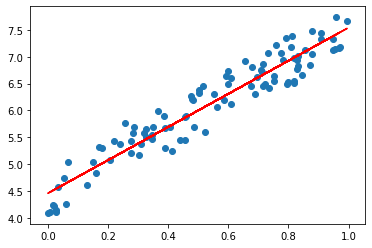

In [40]:
plt.scatter(X, y)
plt.plot(X, w*X + b, color="r")
plt.show()

In [ ]:
使用梯度下降法求解

In [64]:
w = np.random.randn(X.shape[1], 1)
learning_rate = 0.01
for _ in range(100):
    y_pred = X @ w
    loss= np.mean((y_pred - y) ** 2)
    grade_w = X.T @ (X @ w - y)
    w -= 0.01 * grade_w
    print("loss: % f" % loss)
    print(w)

loss:  49.080861
[[6.4678186 ]
 [3.47279024]]
loss:  4.889967
[[4.28359624]
 [2.24103174]]
loss:  0.567572
[[4.95181759]
 [2.65192161]]
loss:  0.144029
[[4.72891239]
 [2.54761892]]
loss:  0.101852
[[4.78549595]
 [2.60299979]]
loss:  0.097056
[[4.75545217]
 [2.6071049 ]]
loss:  0.095992
[[4.75322517]
 [2.62598312]]
loss:  0.095361
[[4.74298385]
 [2.63905433]]
loss:  0.094833
[[4.73589281]
 [2.65282413]]
loss:  0.094368
[[4.72842277]
 [2.66532392]]
loss:  0.093956
[[4.72164171]
 [2.67723124]]
loss:  0.093592
[[4.71518207]
 [2.68839248]]
loss:  0.093269
[[4.70912716]
 [2.69891053]]
loss:  0.092983
[[4.70342119]
 [2.70880482]]
loss:  0.092730
[[4.6980536 ]
 [2.71811785]]
loss:  0.092506
[[4.69300134]
 [2.72688204]]
loss:  0.092307
[[4.68824682]
 [2.73513028]]
loss:  0.092131
[[4.6837722 ]
 [2.74289277]]
loss:  0.091975
[[4.67956109]
 [2.75019818]]
loss:  0.091837
[[4.67559795]
 [2.7570734 ]]
loss:  0.091715
[[4.67186819]
 [2.76354376]]
loss:  0.091607
[[4.66835806]
 [2.76963311]]
loss:  0.